In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
df = pd.read_csv("../zhvi_by_zipcode.csv")
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31
0,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,111151.195242,...,267088.738142,271250.476096,275051.851633,277970.120290,279500.684442,279697.150054,279104.469255,278122.923459,276568.124992,274755.808173
1,91982,1,77494,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,218236.629470,...,460366.228569,467388.730310,473486.818408,477210.492486,477972.632081,476552.241458,474927.181941,473561.165436,471632.475487,469463.920712
2,93144,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,93511.297481,...,180617.660428,182848.963204,185058.256434,187026.835439,188577.658260,189624.441718,190377.686632,191140.365708,191676.845108,192633.473062
3,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,276416.230880,...,835406.121511,842807.006210,852430.158990,860866.920365,867010.977280,866822.751400,865391.430701,864100.411762,862703.784805,861787.760011
4,62093,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,249528.121575,...,759177.513267,766420.820233,774753.358516,781832.465374,785731.251344,785676.921895,784991.325145,784384.072545,782591.242654,781072.618787


In [6]:
df_local = df.loc[(df["Metro"]=="Austin-Round Rock-Georgetown, TX"),:]
num_of_zips = len(df_local["RegionName"])
print(f"There are {num_of_zips} zip codes for the 'Austin-Round Rock-Georgetown' metroplex")

There are 86 zip codes for the 'Austin-Round Rock-Georgetown' metroplex


In [7]:
# Write to CSV
df_local.to_csv('Resources/AustinMetroZHVI.csv')

In [8]:
df_local.dtypes

RegionID        int64
SizeRank        int64
RegionName      int64
RegionType     object
StateName      object
               ...   
2022-09-30    float64
2022-10-31    float64
2022-11-30    float64
2022-12-31    float64
2023-01-31    float64
Length: 286, dtype: object

In [10]:
df_78739 = df_local.loc[df_local["RegionName"]==78739, :]
df_78739_data = df_78739.iloc[:,9:]
df_78739_data

,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,...,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31
5585,359253.222565,360119.934617,360593.264503,361817.135898,361456.328366,361066.984369,360222.794126,359824.779547,359888.743259,361439.429825,...,831006.413701,845983.895531,854035.950967,852474.536476,845728.550181,836555.98254,829830.64314,824913.495518,819702.055836,814084.604018


In [18]:
df_78739_t = df_78739_data.transpose()

Index(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30', '2000-05-31',
       '2000-06-30', '2000-07-31', '2000-08-31', '2000-09-30', '2000-10-31',
       ...
       '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
       '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31', '2023-01-31'],
      dtype='object', length=277)

In [20]:
df_78739_t.reset_index(inplace=True)

In [21]:
df_78739_t

,index,5585
0,2000-01-31,359253.222565
1,2000-02-29,360119.934617
2,2000-03-31,360593.264503
3,2000-04-30,361817.135898
4,2000-05-31,361456.328366
...,...,...
272,2022-09-30,836555.982540
273,2022-10-31,829830.643140
274,2022-11-30,824913.495518
275,2022-12-31,819702.055836


In [22]:
df_local.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'City', 'Metro', 'CountyName', '2000-01-31',
       ...
       '2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
       '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31', '2023-01-31'],
      dtype='object', length=286)

In [27]:
df_local_cut = df_local.drop(columns=['RegionID', 'SizeRank', 'RegionType', 'StateName',
       'State', 'City', 'Metro', 'CountyName'])
df_local_cut.set_index('RegionName', inplace=True)

In [31]:
df_local_corrected = df_local_cut.transpose()

In [49]:
df_local_corrected

RegionName,78660,78666,78641,78613,78745,78664,78640,78753,78681,78741,...,78719,78650,76530,78615,78953,78656,76578,78632,78622,78661
2000-01-31,181323.522006,NaN,197140.788131,211520.384304,155455.254715,153638.882144,NaN,129239.169483,NaN,130299.772261,...,NaN,113373.517029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-02-29,181679.292998,NaN,197170.461011,211446.643475,155315.624837,153981.895572,NaN,129560.510260,NaN,130944.859160,...,NaN,113533.241457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-03-31,181861.475941,NaN,197441.124738,210672.588046,156285.763549,154172.806601,NaN,129756.381270,NaN,131355.965062,...,NaN,114118.929367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-04-30,182324.475232,NaN,198149.663742,209634.992447,157217.270655,154631.109976,NaN,130348.392496,NaN,131995.996340,...,NaN,115070.436724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-31,182730.513988,NaN,198579.186169,208518.169282,157832.870443,155059.716010,NaN,130925.990256,NaN,132280.746897,...,NaN,116032.861269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30,447940.081046,363109.998042,503717.570033,527909.196990,513299.133941,398771.674322,365410.669209,409962.048778,537167.792282,495366.454301,...,419665.163283,435160.094576,332807.623970,491124.987840,568934.913832,334734.439493,342815.818564,441901.303149,251428.305046,219989.665835
2022-10-31,442113.629906,359226.560307,495823.035260,521554.672879,507688.999212,393784.356281,360400.579173,406630.601486,530733.282677,488213.042936,...,413653.267579,430835.802325,327543.388639,483771.965428,565782.318722,332689.665196,338669.385357,438131.018396,249572.362821,217925.382207
2022-11-30,435958.042110,354930.227301,488043.913821,515422.142488,502164.760440,388475.139704,355056.204569,402709.339690,524505.565124,481700.196329,...,406022.757527,426991.630028,321292.087727,476784.653611,561486.854025,330899.466250,334322.882065,433324.146288,247801.156010,216288.216039
2022-12-31,429371.880305,350077.381821,479987.872078,508529.361425,496115.350762,382624.610152,349634.229307,397515.333542,517641.711665,474132.735320,...,396845.639780,423845.540615,314544.445094,470322.849766,557550.015557,329220.916348,329089.327144,430132.209707,245675.954050,214704.264487


In [44]:
x = [dt.datetime.strptime(x, "%Y-%M-%d").date() for x  in df_local_corrected.index]


In [51]:
y= (round(x,2) for x in df_local_corrected[78739])

Text(0.5, 1.0, 'Monies for a home in 78739')

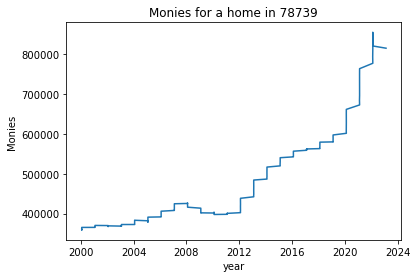

In [55]:
plt.plot(x,y)
plt.xlabel("year")
plt.ylabel("Monies")
plt.title("Monies for a home in 78739")